In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
%matplotlib inline
import seaborn as sns

In [2]:
path='/home/heruhe/Desktop/Ga2o3/cascade/5type/1500ev'
os.chdir(path)
success_s=[]
#list success cascades info according the obtained data last frame
success_s=[]
for i in range(180):
    if os.path.isfile('./data.lastframe{}'.format(i)):
        success_s.append(i)
success_s=np.array(success_s)

In [3]:
#seperate frames into 2 list according to the PKA atom type atom is Ga or O 
pkatype=np.zeros(len(success_s))
for i in range(len(success_s)):
    file="PKA_inf{}.txt".format(success_s[i])
    f=open(file)
    pkatype[i]=int(f.readlines()[0].split()[2])

#frame array which PKA atom is Ga
PKA_Ga_frame=success_s[np.where(pkatype<=2)[0]]
#frame array which PKA atom is O
PKA_O_frame=success_s[np.where(pkatype>2)[0]]

In [57]:
PKA_Ga_frame

array([  0,   5,   7,   8,   9,  10,  13,  17,  22,  23,  24,  25,  27,
        29,  30,  32,  34,  36,  39,  42,  45,  46,  50,  55,  57,  58,
        60,  62,  63,  64,  66,  70,  72,  74,  75,  78,  79,  81,  85,
        86,  88,  89,  90,  91,  92,  95,  96,  98,  99, 100, 103, 106,
       107, 108, 116, 119, 120, 121, 125, 127, 130])

In [4]:
#function to analysis different type interstitial_atom amount from given frame list
def interstitial_atom(frame_list ):    
    defects_amount=np.zeros((len(frame_list),5))
    for i in range(len(frame_list)):
        fn=path+'/defects_analysis/frame{}/new_Iatoms{}.csv'.format(frame_list[i],frame_list[i])
        Idf=pd.read_csv(fn)
        
        for j in range(5):
            newdf=Idf.copy()
            newdf=newdf[newdf['Particle Type']==j+1]
            defects_amount[i,j]=len(newdf)
    
    return  defects_amount


In [5]:
#plot different type defects amount
def plot_defects(I_pkaO,I_pkaGa,I):
    font = {'family' : 'Arial'}
    elements=['Ga1', 'Ga2','O1','O2','O3']
    plt.errorbar(elements, I.mean(axis=0),yerr=I.std(axis=0)/np.sqrt(len(I)),label='regardless of PKA type',linewidth=3,fmt='-o',capsize=5,ecolor='black', elinewidth=2, barsabove=True)
    plt.errorbar(elements, I_pkaO.mean(axis=0),yerr=I_pkaO.std(axis=0)/np.sqrt(len(I_pkaO)),label='PKA type:O',linewidth=3,fmt='-o',capsize=5,ecolor='black', elinewidth=2, barsabove=True)  
    plt.errorbar(elements, I_pkaGa.mean(axis=0),yerr=I_pkaGa.std(axis=0)/np.sqrt(len(I_pkaGa)),label='PKA type:Ga',linewidth=3,fmt='-o',capsize=5,ecolor='black', elinewidth=2, barsabove=True)   
    plt.rcParams["figure.figsize"] = (16,12)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.legend(fontsize=30)
    #plt.xlabel('Vacancy type',fontsize=30)
    plt.xlabel('Interstitial type',fontsize=30)
    plt.ylabel('Number of Vacancies',fontsize=30)
    plt.rcParams["axes.linewidth"] = 3

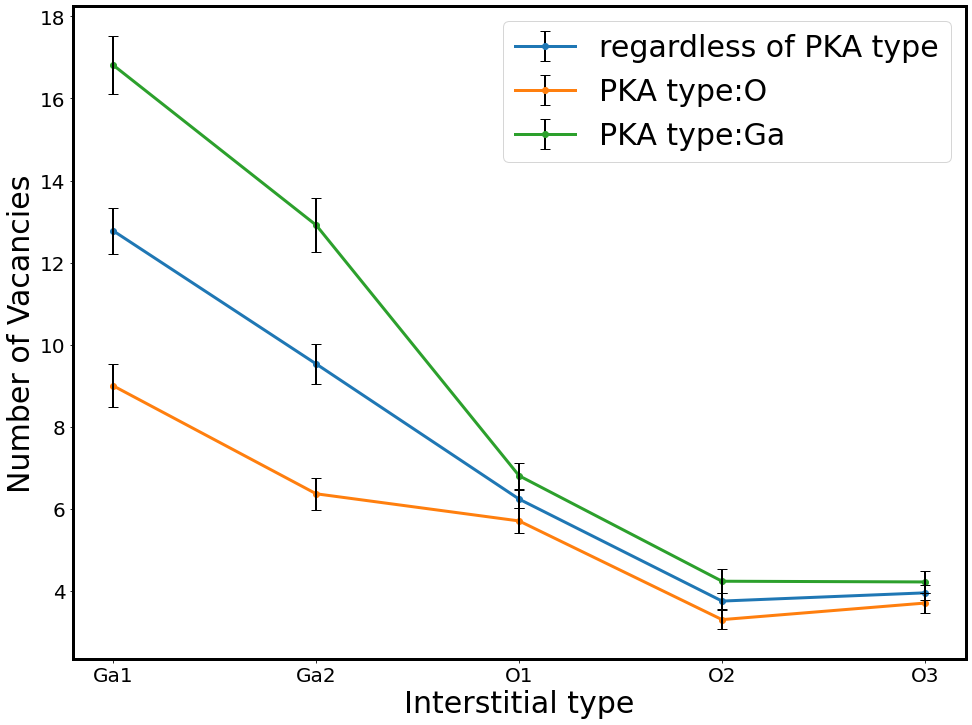

In [7]:
#PKA type is O,all interstitial atom 
I_pkaO=interstitial_atom(PKA_O_frame)
#PKA type is Ga,all interstitial atom
I_pkaGa=interstitial_atom(PKA_Ga_frame)
#regardless PKA type,all interstitial atom
I=interstitial_atom(success_s)
plot_defects(I_pkaO,I_pkaGa,I)

In [8]:
#defects atoms amounts stats respect to different type
def calculate_defects_atom(odf,ddf):
    #displaced atoms 
    dd_atoms=np.zeros(5)
    #original atoms
    od_atoms=np.zeros(5)
    for i in range(5):
        atype=i+1
        dd_atoms[i]=len(ddf[ddf['Particle Type']==atype])
        od_atoms[i]=len(odf[odf['Particle Type']==atype])
    return dd_atoms-od_atoms

In [9]:
#regardless pka type, check defects atoms stats
total_defects_atom=np.zeros((len(success_s),5))
for i in range(len(success_s)):
    odf=pd.read_csv('Idefects_original_position{}.csv'.format(success_s[i]))
    ddf=pd.read_csv('Idefects_displaced_position{}.csv'.format(success_s[i]))
    total_defects_atom[i,:]=calculate_defects_atom(odf,ddf)

In [10]:
#Regardless of Ga & O's type, only consider Ga and O as two atom types
#total Ga interstitial atoms amount
ga_n=total_defects_atom[:,0:2].sum(axis=1)
#total O interstitial atoms amount
o_n=total_defects_atom[:,2:].sum(axis=1)
#calculate defects atoms average and std error value
print('Amount of interstitials Ga atoms is :', np.mean(ga_n),'+/-',np.std(ga_n)/np.sqrt((len(success_s))))
print('Amount of interstitials O atoms is :', np.mean(o_n),'+/-',np.std(o_n)/np.sqrt((len(success_s))))

Amount of interstitials Ga atoms is : 21.875 +/- 0.9415975269603133
Amount of interstitials O atoms is : 10.125 +/- 0.2209708691207961


(array([ 2.,  4.,  6.,  8., 10., 12., 14.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

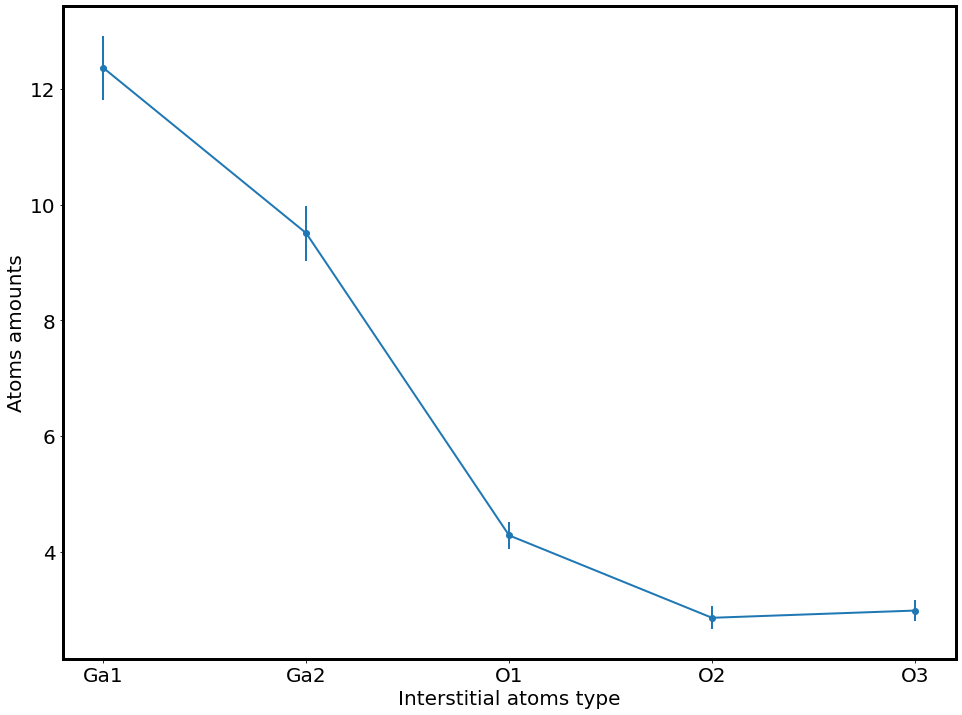

In [11]:
#calculate defects atoms average and std error value
elements=['Ga1', 'Ga2','O1','O2','O3']
defects_atoms_mean=np.mean(total_defects_atom,axis=0)
defects_atoms_stde=np.std(total_defects_atom,axis=0)/np.sqrt((len(success_s)))
#plot defects atoms stats
plt.errorbar(elements,defects_atoms_mean,yerr=defects_atoms_stde,linewidth=2,fmt='-o')
plt.ylabel('Atoms amounts',fontsize=20)
plt.xlabel('Interstitial atoms type',fontsize=20)
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["figure.figsize"] = (10,8)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


In [12]:
elements=np.array(['Ga1', 'Ga2','O1','O2','O3'])
elements

array(['Ga1', 'Ga2', 'O1', 'O2', 'O3'], dtype='<U3')

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

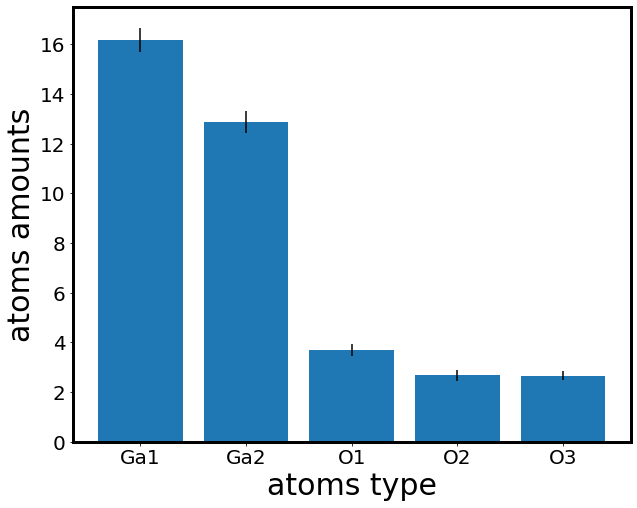

In [13]:
# pka type is Ga, check defects atoms stats
total_defects_atom=np.zeros((len(PKA_Ga_frame),5))
for i in range(len(PKA_Ga_frame)):
    odf=pd.read_csv('Idefects_original_position{}.csv'.format(PKA_Ga_frame[i]))
    ddf=pd.read_csv('Idefects_displaced_position{}.csv'.format(PKA_Ga_frame[i]))
    total_defects_atom[i,:]=calculate_defects_atom(odf,ddf)
#calculate defects atoms average and std error value
defects_atoms_mean=np.mean(total_defects_atom,axis=0)
defects_atoms_stde=np.std(total_defects_atom,axis=0)/np.sqrt((len(success_s)))
#plot defects atoms stats
plt.bar(elements,defects_atoms_mean,yerr=defects_atoms_stde)
plt.ylabel('atoms amounts',fontsize=30)
plt.xlabel('atoms type',fontsize=30)
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["figure.figsize"] = (16,10)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

(array([ 0.,  2.,  4.,  6.,  8., 10.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

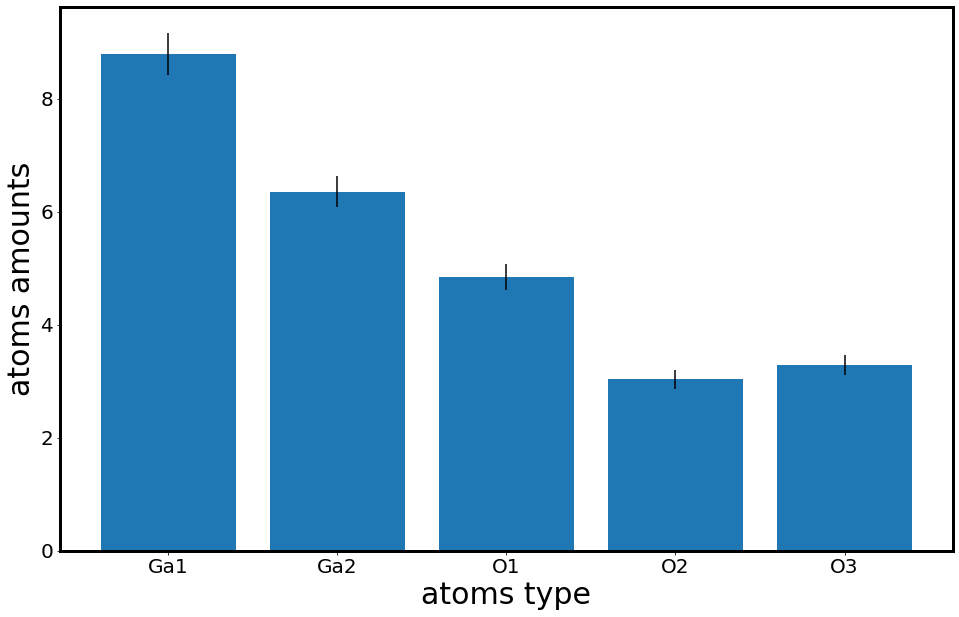

In [14]:
# pka type is O, check defects atoms stats
total_defects_atom=np.zeros((len(PKA_O_frame),5))
for i in range(len(PKA_O_frame)):
    odf=pd.read_csv('Idefects_original_position{}.csv'.format(PKA_O_frame[i]))
    ddf=pd.read_csv('Idefects_displaced_position{}.csv'.format(PKA_O_frame[i]))
    total_defects_atom[i,:]=calculate_defects_atom(odf,ddf)
#calculate defects atoms average and std error value
defects_atoms_mean=np.mean(total_defects_atom,axis=0)
defects_atoms_stde=np.std(total_defects_atom,axis=0)/np.sqrt((len(success_s)))
#plot defects atoms stats
plt.bar(elements,defects_atoms_mean,yerr=defects_atoms_stde)
plt.ylabel('atoms amounts',fontsize=30)
plt.xlabel('atoms type',fontsize=30)
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["figure.figsize"] = (16,10)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [15]:
#function to analysis different type vacancy_atom amount from given frame list
def vacancy_atom(frame_list ):    
    defects_amount=np.zeros((len(frame_list),5))
    for i in range(len(frame_list)):
        fn=path+'/Vacancy_position{}.csv'.format(frame_list[i])
        Idf=pd.read_csv(fn)
        
        for j in range(5):
            newdf=Idf.copy()
            newdf=newdf[newdf['Particle Type']==j+1]
            defects_amount[i,j]=len(newdf)
    
    return  defects_amount


[5. 5. 3. 0. 4.]


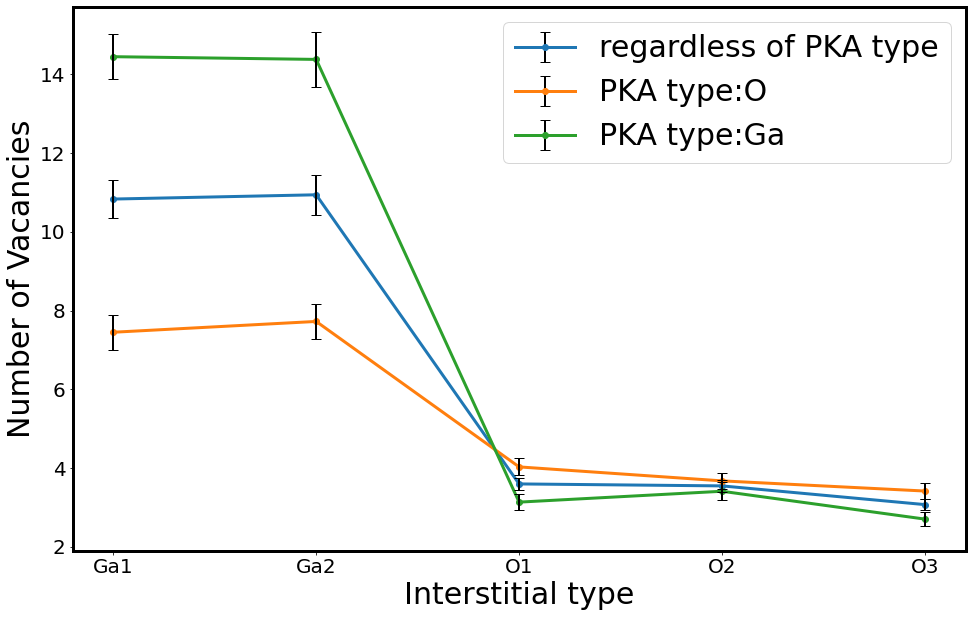

In [16]:
#PKA type is O,all vacancy atom 
V_pkaO=vacancy_atom(PKA_O_frame)
print(V_pkaO[1])
#PKA type is Ga,all vacancy atom
V_pkaGa=vacancy_atom(PKA_Ga_frame)
#regardless PKA type,all vacancy atom
V=vacancy_atom(success_s)
plot_defects(V_pkaO,V_pkaGa,V)

In [17]:
#function count two types deffects Ga and O amounts according to 5 types defects results
def Ga_O_defects(dfects):
    #imput 5 types defects amount for all dataframe
    #output 2 types defects amount for all dataframe
    
    Ga_O_defects=np.zeros((len(dfects),2))
#Ga vacancy amount
    Ga_O_defects[:,0]=np.sum(dfects[:,0:2],axis=1)
#O vacancy amount
    Ga_O_defects[:,1]=np.sum(dfects[:,2:],axis=1)
    return Ga_O_defects

(0.0, 45.0)

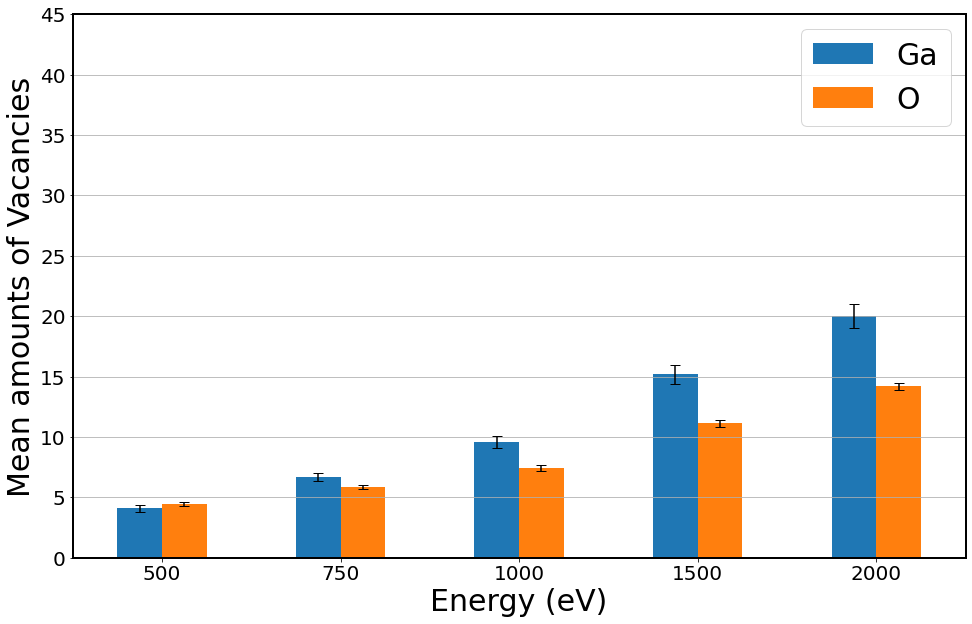

In [22]:
#PKA type is O
energy=[500,750,1000,1500,2000]
v_mean=np.zeros((5,2))
v_err=np.zeros((5,2))
for j in range(5):
    e=energy[j]
    E=str(e)+'ev'
    path='/home/heruhe/Desktop/Ga2o3/cascade/5type/'+E
    os.chdir(path) 
    success_s=[]
    #list success cascades info according the obtained data last frame
    success_s=[]
    for s in range(180):
        if os.path.isfile('./data.lastframe{}'.format(s)):
            success_s.append(s)
    success_s=np.array(success_s)
    #seperate frames into 2 list according to the PKA atom type atom is Ga or O 
    pkatype=np.zeros(len(success_s))
    for i in range(len(success_s)):
        file="PKA_inf{}.txt".format(success_s[i])
        f=open(file)
        pkatype[i]=int(f.readlines()[0].split()[2])

    #frame array which PKA atom is Ga
    PKA_Ga_frame=success_s[np.where(pkatype<=2)[0]]
    #frame array which PKA atom is O
    PKA_O_frame=success_s[np.where(pkatype>2)[0]]
    V_pkaO=Ga_O_defects(vacancy_atom(PKA_O_frame))
    #V_pkaGa=Ga_O_defects(vacancy_atom(PKA_Ga_frame))
    v_mean[j,]=V_pkaO.mean(axis=0)
    v_err[j,]=V_pkaO.std(axis=0)/np.sqrt(len(V_pkaO))
dfv_mean=pd.DataFrame(v_mean,columns= ['Ga','O'], index = energy)
dfv_err=pd.DataFrame(v_err,columns= ['Ga','O'], index = energy)
dfv_mean.plot(kind='bar', yerr=dfv_err, rot=0, alpha=1, figsize=(16,10),fontsize=30,capsize=5).grid(axis='y')
plt.rcParams["figure.figsize"] = (16,10)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=30)
plt.xlabel('Energy (eV)',fontsize=30)
plt.ylabel('Mean amounts of Vacancies',fontsize=30)
plt.rcParams["axes.linewidth"] = 2
plt.ylim((0,45))

(0.0, 45.0)

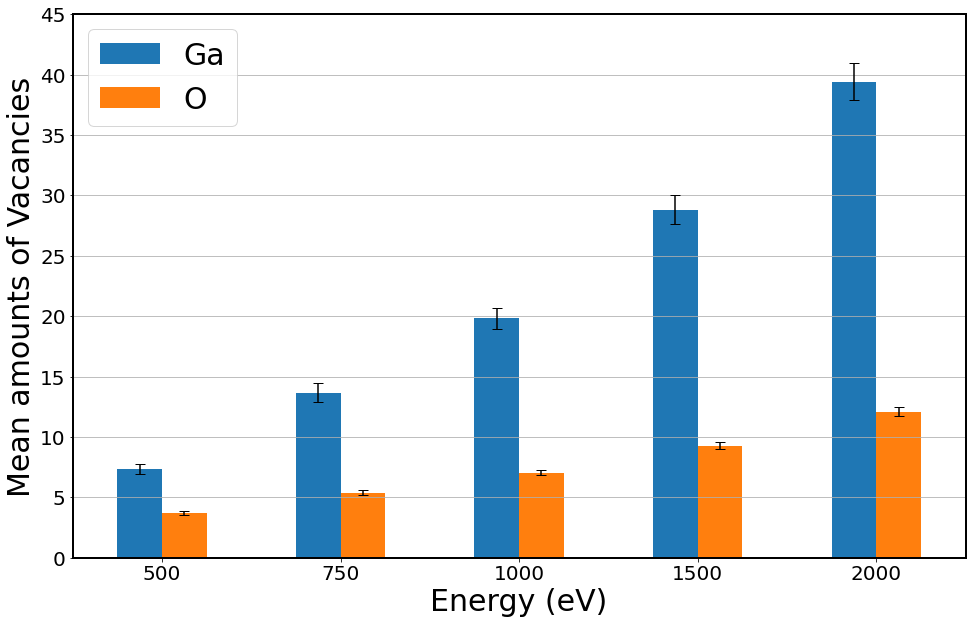

In [23]:
#PKA type is Ga
energy=[500,750,1000,1500,2000]
v_mean=np.zeros((5,2))
v_err=np.zeros((5,2))
for j in range(5):
    e=energy[j]
    E=str(e)+'ev'
    path='/home/heruhe/Desktop/Ga2o3/cascade/5type/'+E
    os.chdir(path) 
    success_s=[]
    #list success cascades info according the obtained data last frame
    success_s=[]
    for s in range(180):
        if os.path.isfile('./data.lastframe{}'.format(s)):
            success_s.append(s)
    success_s=np.array(success_s)
    #seperate frames into 2 list according to the PKA atom type atom is Ga or O 
    pkatype=np.zeros(len(success_s))
    for i in range(len(success_s)):
        file="PKA_inf{}.txt".format(success_s[i])
        f=open(file)
        pkatype[i]=int(f.readlines()[0].split()[2])

    #frame array which PKA atom is Ga
    PKA_Ga_frame=success_s[np.where(pkatype<=2)[0]]
    #frame array which PKA atom is O
    PKA_O_frame=success_s[np.where(pkatype>2)[0]]
    #V_pkaO=Ga_O_defects(vacancy_atom(PKA_O_frame))
    V_pkaGa=Ga_O_defects(vacancy_atom(PKA_Ga_frame))
    v_mean[j,]=V_pkaGa.mean(axis=0)
    v_err[j,]=V_pkaGa.std(axis=0)/np.sqrt(len(V_pkaO))
dfv_mean=pd.DataFrame(v_mean,columns= ['Ga','O'], index = energy)
dfv_err=pd.DataFrame(v_err,columns= ['Ga','O'], index = energy)
dfv_mean.plot(kind='bar', yerr=dfv_err, rot=0, alpha=1, figsize=(16,10),fontsize=30,capsize=5).grid(axis='y')
plt.rcParams["figure.figsize"] = (16,10)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=30)
plt.xlabel('Energy (eV)',fontsize=30)
plt.ylabel('Mean amounts of Vacancies',fontsize=30)
plt.rcParams["axes.linewidth"] = 2
plt.ylim((0,45))